In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.legend(labels=["Actual","Prediction"])
    plt.title(Title)
    plt.xlabel('Price (in dollars)')

    plt.show()
    plt.close()

In [4]:
def MyLabelEncoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [5]:
frames = [pd.read_csv("student-mat.csv"), pd.read_csv("student-por.csv")]
df = pd.concat(frames)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
df = MyLabelEncoder(df)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


In [7]:
df.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.074955,0.169938,-0.341657,0.034882,0.024030,-0.235114,-0.187611,-0.178121,-0.058046,...,-0.036359,0.026008,0.037000,0.066006,0.026539,-0.053214,-0.155146,-0.169123,-0.144858,-0.127114
sex,-0.074955,1.000000,-0.038832,0.011556,0.094361,0.051337,0.109387,0.070786,0.169959,0.083938,...,0.074725,0.181603,0.062530,0.275928,0.302623,0.141113,-0.013076,-0.025122,-0.025024,-0.031472
age,0.169938,-0.038832,1.000000,-0.071257,0.013290,0.006887,-0.130196,-0.138521,-0.072088,-0.045305,...,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
address,-0.341657,0.011556,-0.071257,1.000000,0.054484,-0.074097,0.179720,0.124303,0.148470,-0.002097,...,-0.016801,-0.009744,0.030790,-0.064030,-0.043391,-0.010895,0.036696,0.113113,0.127793,0.117696
famsize,0.034882,0.094361,0.013290,0.054484,1.000000,-0.207302,-0.025556,-0.047290,0.038054,-0.069065,...,-0.005328,-0.007249,0.005889,0.075646,0.090019,-0.009147,0.018284,0.057610,0.057469,0.061209
Pstatus,0.024030,0.051337,0.006887,-0.074097,-0.207302,1.000000,-0.077133,-0.049156,-0.035206,0.047796,...,0.042448,0.038714,0.020498,0.015777,0.047575,0.016213,-0.113955,-0.000155,-0.010219,-0.030693
Medu,-0.235114,0.109387,-0.130196,0.179720,-0.025556,-0.077133,1.000000,0.642063,0.462509,0.156851,...,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.187611,0.070786,-0.138521,0.124303,-0.047290,-0.049156,0.642063,1.000000,0.279218,0.209255,...,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
Mjob,-0.178121,0.169959,-0.072088,0.148470,0.038054,-0.035206,0.462509,0.279218,1.000000,0.202347,...,0.030417,0.077780,0.000316,0.058009,0.011837,0.075821,0.051644,0.130840,0.115321,0.105640
Fjob,-0.058046,0.083938,-0.045305,-0.002097,-0.069065,0.047796,0.156851,0.209255,0.202347,1.000000,...,0.030325,-0.040575,-0.017461,0.063299,0.054334,-0.022271,-0.013009,0.084520,0.072577,0.040541


school, address, Medu, Fedu, Mjob, Dak

In [8]:
lr = LinearRegression()

x = df[["Dalc","sex", "goout"]]
y = df["Walc"]

x_train, x_test, y_train, y_test =  train_test_split(x , y, random_state= 0)

In [9]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)

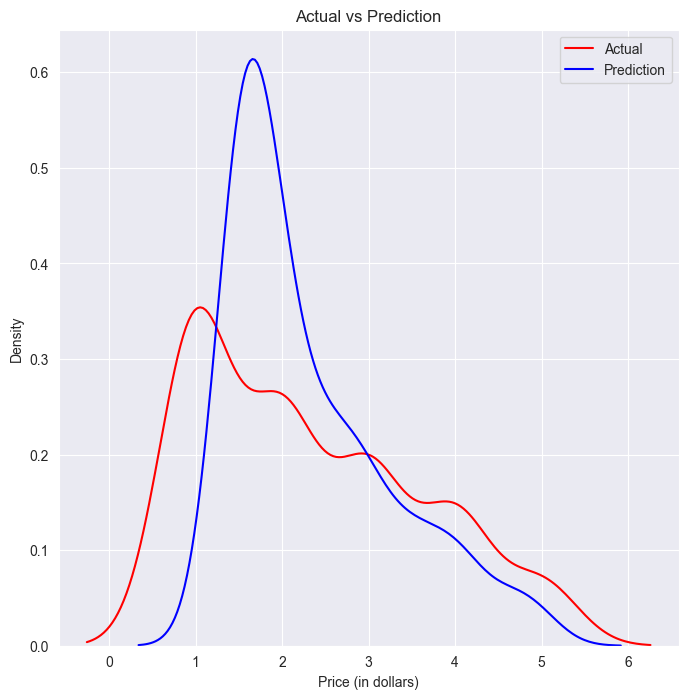

In [10]:
DistributionPlot(y_test, yhat, "Actual", "Prediction", "Actual vs Prediction")

In [11]:
print(f"Accuracy: {round(poly.score(x_test_pr, y_test) * 100, 2)} %")

Accuracy: 52.31 %
